In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import re

# Part 1

In [2]:
!wget "https://raw.githubusercontent.com/mairara/jcs270-assignment4/main/Corona_NLP_test.csv"

--2025-03-16 21:58:44--  https://raw.githubusercontent.com/mairara/jcs270-assignment4/main/Corona_NLP_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1002494 (979K) [text/plain]
Saving to: ‘Corona_NLP_test.csv.14’

Corona_NLP_test.csv 100%[===================>] 979.00K  --.-KB/s    in 0.004s  

2025-03-16 21:58:45 (221 MB/s) - ‘Corona_NLP_test.csv.14’ saved [1002494/1002494]



In [3]:
!wget "https://raw.githubusercontent.com/mairara/jcs270-assignment4/main/Corona_NLP_train.csv"

--2025-03-16 21:58:45--  https://raw.githubusercontent.com/mairara/jcs270-assignment4/main/Corona_NLP_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10500262 (10M) [text/plain]
Saving to: ‘Corona_NLP_train.csv.14’

Corona_NLP_train.cs 100%[===================>]  10.01M  --.-KB/s    in 0.05s   

2025-03-16 21:58:45 (192 MB/s) - ‘Corona_NLP_train.csv.14’ saved [10500262/10500262]



In [4]:
train = pd.read_csv("Corona_NLP_train.csv", encoding='latin1')

test = pd.read_csv("Corona_NLP_test.csv", encoding='latin1')

In [5]:
train.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


Number of tweets Negative: 12012
Number of tweets Neutral: 6172
Number of tweets Positive: 14383


<AxesSubplot: title={'center': 'Sentiment Counts'}, xlabel='Sentiment'>

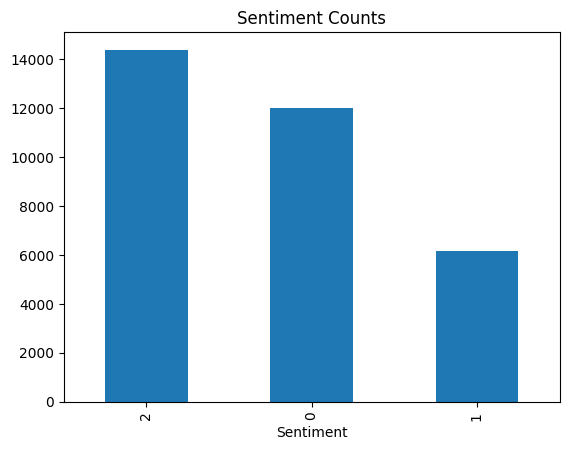

In [7]:
train['Sentiment'] = train['Sentiment'].replace('Extremely Negative', 0)
train['Sentiment'] = train['Sentiment'].replace('Negative', 0)
train['Sentiment'] = train['Sentiment'].replace('Neutral', 1)
train['Sentiment'] = train['Sentiment'].replace('Positive', 2)
train['Sentiment'] = train['Sentiment'].replace('Extremely Positive', 2)

for col in train.columns:
    train.dropna(subset=[col], inplace=True)

train = train.reindex()

sentiment_counts = train['Sentiment'].value_counts()
print("Number of tweets Negative:", sentiment_counts[0])
print("Number of tweets Neutral:", sentiment_counts[1])
print("Number of tweets Positive:", sentiment_counts[2])

sentiment_counts.plot(kind='bar', title='Sentiment Counts')


In [8]:
import nltk
# Download the tokenizer
nltk.download('punkt')
def tockenizer(data):
    data['tokens'] = data['OriginalTweet'].apply(nltk.word_tokenize)
    return data


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
import re

def remove_url(tokenize: list):
    tokens_no_url = []
    for row in tokenize:
        row_no_url = []
        for t in row:
            if "http" in t or "//" in t: 
                t = ""
            row_no_url.append(t)
        tokens_no_url.append(row_no_url)    

    return tokens_no_url


In [10]:
def remove_punct(tokenize: list):
    tokens_no_punc = []
    for row in tokenize:
        tokens_no_punc.append([re.sub("[^\w\s]", "", t) for t in row])
    
    return tokens_no_punc
 

In [11]:
def make_lowercase(tokenize: list):
    tokens_lower = []
    for row in tokenize:
        tokens_lower.append([t.lower() for t in row])
    
    return tokens_lower

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# we want to remove the first 100 words only
sw = stopwords.words('english')[:100]

def remove_stopwords(tokenize: list):
    tokens_no_stop = []
    for row in tokenize:
        tokens_no_stop.append([t for t in row if t not in stopwords])
    
    return tokens_no_stop

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
data = tockenizer(train)

data.head()



,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,tokens
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, http..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2,"[advice, Talk, to, your, neighbours, family, t..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2,"[Coronavirus, Australia, :, Woolworths, to, gi..."
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,2,"[As, news, of, the, regionÂs, first, confirme..."
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,2,"[Cashier, at, grocery, store, was, sharing, hi..."


In [14]:
data['remove_url'] = remove_url(data['tokens'])
data['remove_punc'] = remove_punct(data['remove_url'])
data['make_lowercase'] = make_lowercase(data['remove_punc'])


In [15]:
print(data.head())

   UserName  ScreenName                   Location     TweetAt  \
0      3799       48751                     London  16-03-2020   
1      3800       48752                         UK  16-03-2020   
2      3801       48753                  Vagabonds  16-03-2020   
5      3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   
6      3805       48757       35.926541,-78.753267  16-03-2020   

                                       OriginalTweet  Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...          1   
1  advice Talk to your neighbours family to excha...          2   
2  Coronavirus Australia: Woolworths to give elde...          2   
5  As news of the regionÂs first confirmed COVID...          2   
6  Cashier at grocery store was sharing his insig...          2   

                                              tokens  \
0  [@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, http...   
1  [advice, Talk, to, your, neighbours, family, t...   
2  [Coronavirus, Australia, :, W

In [16]:
data.drop(['tokens', 'remove_url', 'remove_punc'], axis=1, inplace=True)

data['tokens'] = data['make_lowercase']

data.drop(['make_lowercase'], axis=1, inplace=True)

no_blanks = []
for row in data['tokens']:
    no_blanks.append([t for t in row if t != ''])

data['tokens'] = no_blanks
print(data.head())






   UserName  ScreenName                   Location     TweetAt  \
0      3799       48751                     London  16-03-2020   
1      3800       48752                         UK  16-03-2020   
2      3801       48753                  Vagabonds  16-03-2020   
5      3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   
6      3805       48757       35.926541,-78.753267  16-03-2020   

                                       OriginalTweet  Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...          1   
1  advice Talk to your neighbours family to excha...          2   
2  Coronavirus Australia: Woolworths to give elde...          2   
5  As news of the regionÂs first confirmed COVID...          2   
6  Cashier at grocery store was sharing his insig...          2   

                                              tokens  
0         [menyrbie, phil_gahan, chrisitv, and, and]  
1  [advice, talk, to, your, neighbours, family, t...  
2  [coronavirus, australia, woolwor

# Stemming

In [18]:
#### Stemming tokens ####
from nltk.stem.porter import *
    
stemmer = PorterStemmer()

token_stems = []

for row in data['tokens']:
    token_stems.append([stemmer.stem(w) for w in row])

data['token_stems'] = token_stems

data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,tokens,token_stems
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[menyrbie, phil_gahan, chrisitv, and, and]","[menyrbi, phil_gahan, chrisitv, and, and]"
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2,"[advice, talk, to, your, neighbours, family, t...","[advic, talk, to, your, neighbour, famili, to,..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2,"[coronavirus, australia, woolworths, to, give,...","[coronaviru, australia, woolworth, to, give, e..."
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,2,"[as, news, of, the, regionâs, first, confirmed...","[as, news, of, the, regionâ, first, confirm, c..."
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,2,"[cashier, at, grocery, store, was, sharing, hi...","[cashier, at, groceri, store, wa, share, hi, i..."


## using count vectors

## using TF-IDF vectors

# Lemmatization (TF-IDF vectors) 

In [29]:
# from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

token_lemms = []

for row in data['tokens']:
    token_lemms.append([lemmatizer.lemmatize(t) for t in row])

data['token_lemms'] = token_lemms

data.head()



[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,tokens,token_stems,token_lemms
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[menyrbie, phil_gahan, chrisitv, and, and]","[menyrbi, phil_gahan, chrisitv, and, and]","[menyrbie, phil_gahan, chrisitv, and, and]"
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2,"[advice, talk, to, your, neighbours, family, t...","[advic, talk, to, your, neighbour, famili, to,...","[advice, talk, to, your, neighbour, family, to..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2,"[coronavirus, australia, woolworths, to, give,...","[coronaviru, australia, woolworth, to, give, e...","[coronavirus, australia, woolworth, to, give, ..."
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,2,"[as, news, of, the, regionâs, first, confirmed...","[as, news, of, the, regionâ, first, confirm, c...","[a, news, of, the, regionâs, first, confirmed,..."
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,2,"[cashier, at, grocery, store, was, sharing, hi...","[cashier, at, groceri, store, wa, share, hi, i...","[cashier, at, grocery, store, wa, sharing, his..."
